# Import the dependant Packages

In [1]:
using HierarchicalEOM  # this automatically loads `QuantumToolbox`
using CairoMakie  

# Define the system Hamiltonian

In [2]:
ϵ = -5
U = 10
σm = sigmam() # σ-
σz = sigmaz() # σz
II = qeye(2)  # identity matrix

# construct the annihilation operator for both spin-up and spin-down
# (utilize Jordan–Wigner transformation)
d_up = tensor(σm, II)
d_dn = tensor(-1 * σz, σm)
Hsys = ϵ * (d_up' * d_up + d_dn' * d_dn) + U * (d_up' * d_up * d_dn' * d_dn)


Quantum Object:   type=Operator   dims=[2, 2]   size=(4, 4)   ishermitian=true
4×4 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 2 stored entries:
     ⋅           ⋅           ⋅          ⋅    
     ⋅      -5.0+0.0im       ⋅          ⋅    
     ⋅           ⋅      -5.0+0.0im      ⋅    
     ⋅           ⋅           ⋅          ⋅    

# Construct the Bath Objects

In [3]:
Γ = 2 # electron cavity couplings strength
μ = 0 # chimical potential of the fermionic reservoirs
W = 10 # band-widths of the fermionic reservoir
kT = 0.5 # product of the boltzmann constant and temperature
N = 5 # number of the exponential terms for the fermionic reservoir
bath_up = Fermion_Lorentz_Pade(d_up, Γ, μ, W, kT, N)
bath_dn = Fermion_Lorentz_Pade(d_dn, Γ, μ, W, kT, N)
bath_list = [bath_up, bath_dn]

2-element Vector{FermionBath}:
 FermionBath object with 12 terms.

 FermionBath object with 12 terms.


# Construct HEOMLS Matrix

In [4]:
tier = 3
M_even = M_Fermion(Hsys, tier, bath_list)
M_odd = M_Fermion(Hsys, tier, bath_list, ODD)

Preparing block matrices for HEOM Liouvillian superoperator (using 1 threads)...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
Constructing matrix...[DONE]
Preparing block matrices for HEOM Liouvillian superoperator (using 1 threads)...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Constructing matrix...[DONE]


Fermion type HEOMLS matrix acting on odd-parity ADOs
system dims = [2, 2]
number of ADOs N = 2325
data =
MatrixOperator(37200 × 37200)

# Solve stationary state of ADOs (Auxilliary Statistical Operators)

In [5]:
ados_s = steadystate(M_even)

Solving steady state for ADOs by linear-solve method...
Calculating left preconditioner with ilu...[DONE]
Solving linear problem...[DONE]


2325 Auxiliary Density Operators with even-parity and (system) dims = [2, 2]


# Spectral Density

In [6]:
p = PowerSpectrum(M_odd, ados_s, d_up, ωlist)

LoadError: UndefVarError: `ωlist` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [7]:
fig = Figure(size = (500, 350))
ax = Axis(fig[1, 1], xlabel = L"\omega", ylabel = L"S(\omega)", title = "Spectral density")
lines!(ax, ωlist, p)

fig

LoadError: UndefVarError: `ωlist` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

# Calculate density of states

In [31]:
ωlist = -20:1:20
dos = DensityOfStates(M_odd, ados_s, d_up, ωlist)

Calculating density of states in frequency domain...
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 30s (ETA: 0h 00m 00s)
[DONE]


41-element Vector{Float64}:
 0.0007943296575487483
 0.001002303681515753
 0.0012840140642927042
 0.0016734042277225494
 0.0022242515390286165
 0.0030247491507437796
 0.004225558674803123
 0.006096975856684387
 0.00915364348135953
 0.014449419117577755
 0.02434162065285107
 0.044655520423835963
 0.09077144051560644
 ⋮
 0.044655520423844845
 0.02434162065287433
 0.014449419117587561
 0.009153643481369027
 0.0060969758566940015
 0.004225558674809109
 0.0030247491507507805
 0.002224251539035619
 0.001673404227728998
 0.0012840140642989104
 0.0010023036815215872
 0.0007943296575542253

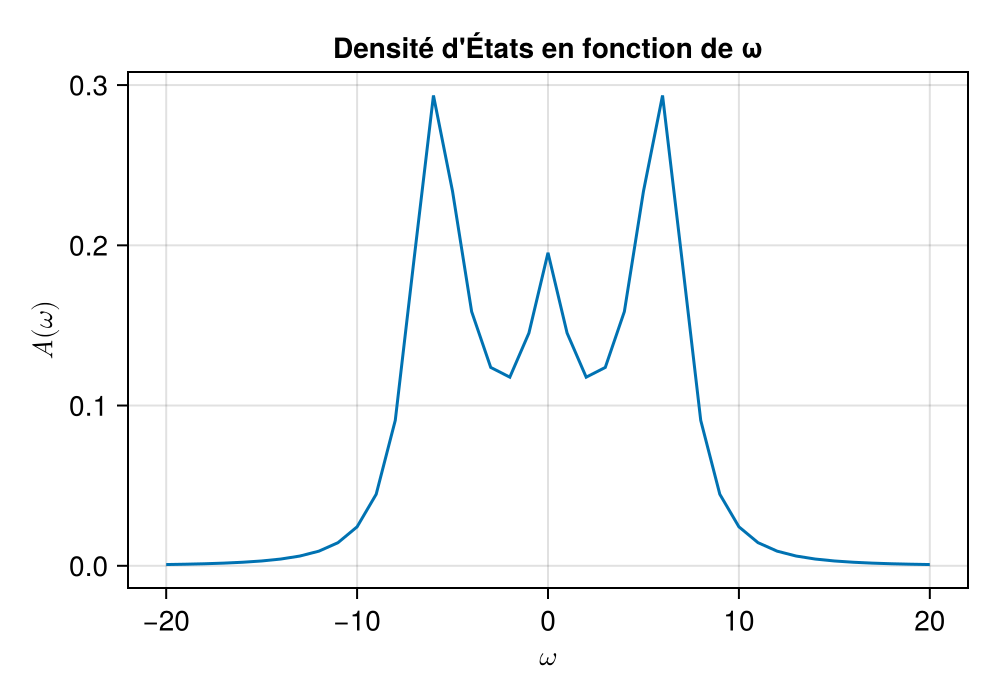

In [32]:

fig = Figure(size = (500, 350))

ax = Axis(fig[1, 1], xlabel = L"\omega", ylabel = L"A(\omega)", title = "Densité d'États en fonction de ω")

lines!(ax, ωlist, dos)

fig

### Notes

* ***LHB*** : Lower Hubbard Band ( $\omega = \epsilon + U$ )
* ***UHB*** : Upper Hubbard Band ( $\omega = \epsilon$ )
* ***Kondo*** : pic Kondo central

* ***Signature of strong correlations*** 
    The presence of Hubbard bands shows that the system cannot be described as a simple metal; electronic correlations are crucial
    
* ***Mott-Hubbard transition*** 
    When $U$ becomes very large, the Hubbard bands move away from each other and the Kondo peak disappears: the system becomes a Mott insulator.
    
* ***Spectroscopy*** 
    The Hubbard bands are experimentally accessible through out-of-equilibrium transport measurements (tunneling spectroscopy, STM, etc.)
    
* ***Complementarity with the Kondo peak***
    The Hubbard bands surround the Kondo peak, which is a subtle consequence of the mixing between empty and doubly occupied states allowed by the coupling to the reservoirs.

# CONCLUSION

At low temperature, the Kondo effect leads to a restoration of conductance even when the system is in the Coulomb blockade regime (where the current would normally be suppressed).